# **Test 1 - Logistic Regression**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for confusion matrix
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from scipy.special import expit
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [36]:
from google.colab import files
  
  
uploaded = files.upload()

In [39]:
iris = pd.read_csv("iris_data.csv")

In [40]:
iris.head(30)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [41]:
iris_mv = pd.read_csv("iris_with_MV.csv")

In [42]:
iris_mv.head(30)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,NaN,0.1,Iris-setosa


# **Choosing "class" column to create 15 percents of missing values on, using a fixed random state of 418**

In [43]:
iris_MV_2 = iris
iris_MV_2.loc[iris_MV_2.sample(frac=0.15, random_state = 418).index, "class"] = np.nan

In [44]:
iris_MV_2.head(30)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,NaN


***Drop NA rows and create new table (use for training and testing***

In [45]:
iris_MV_2_drop = iris_MV_2.dropna()

In [46]:
iris_MV_2_drop.head(30)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa


***Keep only NA rows for prediction purpose***

In [47]:
iris_MV_2_pred = iris_MV_2[iris_MV_2['class'].isnull()]

In [48]:
iris_MV_2_pred.head(30)

,sepal length,sepal width,petal length,petal width,class
9,4.9,3.1,1.5,0.1,NaN
10,5.4,3.7,1.5,0.2,NaN
17,5.1,3.5,1.4,0.3,NaN
22,4.6,3.6,1.0,0.2,NaN
29,4.7,3.2,1.6,0.2,NaN
40,5.0,3.5,1.3,0.3,NaN
54,6.5,2.8,4.6,1.5,NaN
55,5.7,2.8,4.5,1.3,NaN
57,4.9,2.4,3.3,1.0,NaN
58,6.6,2.9,4.6,1.3,NaN


# **Re-ordering the columns**

In [33]:
#df = iris_mv[['sepal length', 'sepal width', 'petal width', 'class', 'petal length']]

# **Replace Na with 999 otherwise can't run LR model**

In [35]:
#df.fillna(999, inplace=True)

# **Replacing String with numbers for LR**

In [37]:
#df.replace(regex=True,inplace=True,to_replace=r'\t',value=r'')
#df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x )
### Map text class to 1/0 and do some cleaning 
#df['class'] = df['class'].replace(to_replace={'Iris-setosa':2,'Iris-versicolor':1,'Iris-virginica':0})

In [49]:
iris_MV_2_drop.replace(regex=True,inplace=True,to_replace=r'\t',value=r'')
iris_MV_2_drop=iris_MV_2_drop.apply(lambda x: x.str.strip() if x.dtype == "object" else x )
### Map text class to 1/0 and do some cleaning 
iris_MV_2_drop['class'] = iris_MV_2_drop['class'].replace(to_replace={'Iris-setosa':2,'Iris-versicolor':1,'Iris-virginica':0})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [50]:
iris_MV_2_drop.head(30)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
5,5.4,3.9,1.7,0.4,2
6,4.6,3.4,1.4,0.3,2
7,5.0,3.4,1.5,0.2,2
8,4.4,2.9,1.4,0.2,2
11,4.8,3.4,1.6,0.2,2


In [76]:
#iris_MV_2.fillna(-1, inplace=True)

# **Extract X as all Columns except the first column and Y as last column**

In [51]:
X_2=iris_MV_2_drop[iris_MV_2_drop.columns[0:4]]
Y_2=iris_MV_2_drop[iris_MV_2_drop.columns[4:5]]

In [41]:
#X=df[df.columns[0:4]]
#X.head(30)
#Y = df[df.columns[4:5]]
#Y.head(30)

# **Visualize the Data**

### **Visualize the correlation of the parameters using Heatmap**

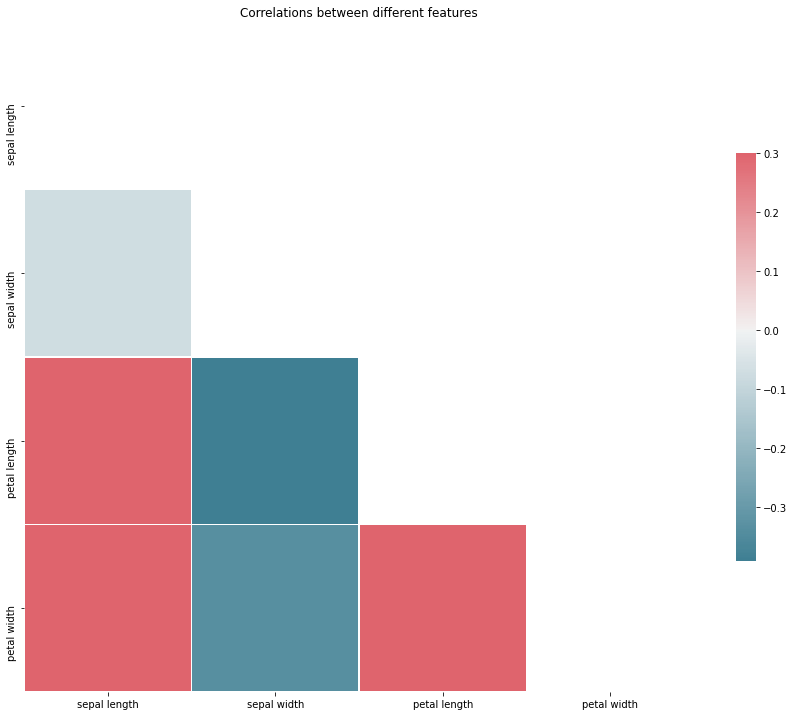

In [52]:
corr_iris_MV_2_drop = X_2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_iris_MV_2_drop, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_iris_MV_2_drop, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different features')
plt.show()

# **Spilliting the data into training set and testing set**

In [54]:
# For Classification
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, Y_2, test_size = 0.3, random_state=418)
print(X_train2.shape)
print(X_test2.shape)

(89, 4)
(39, 4)


In [55]:
lr = LogisticRegressionCV(Cs=1,max_iter=100,solver='liblinear',class_weight=None,scoring='f1',random_state=418,cv=10)
lr.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=1, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=418, refit=True, scoring='f1',
                     solver='liblinear', tol=0.0001, verbose=0)

In [56]:
### The coefficients value of logistic model
print(lr.coef_)

[[-0.00713651 -0.00532405 -0.00086646  0.00039742]
 [-0.00680711 -0.00467276 -0.00257445 -0.00082765]
 [-0.00897497 -0.00225948 -0.01084896 -0.00411413]]


In [ ]:
# For numerical, didn't work, need to try Regressor()
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
#print(X_train.shape)
#print(X_test.shape)
#lr = LogisticRegressionCV(Cs=1,max_iter=100,solver='liblinear',class_weight=None,scoring='f1',random_state=42,cv=10)
#lr.fit(X_train, y_train)

# **Plot ROC Curve**

In [65]:
# Didn't work - need to fix
# Helper function to plot the ROC curve
def auc_scorer(clf, X, y, model): 
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

# **Prediction**

In [57]:
X_test_predict2=lr.predict_proba(X_test2)
X_test_predict2.shape

(39, 3)

In [58]:
iris_MV_2_drop = pd.DataFrame({'x': X_test_predict2[:,0], 'y': y_test2['class'].tolist()})

In [59]:
iris_MV_2_drop = iris_MV_2_drop.sort_values(by='x')

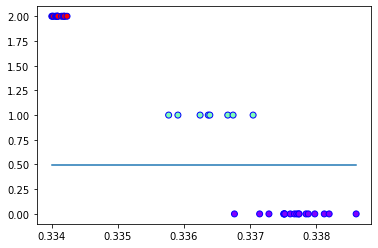

In [60]:
sigmoid_function = expit(iris_MV_2_drop['x'] * lr.coef_[0][3] + lr.intercept_[0]).ravel()
plt.plot(iris_MV_2_drop['x'], sigmoid_function)
plt.scatter(iris_MV_2_drop['x'], iris_MV_2_drop['y'], c=iris_MV_2_drop['y'], cmap='rainbow', edgecolors='b')

# **Compute the accuracy and confusion matrix**

In [67]:
print(" ********************************** Train Results Start Here ********************************** \n")



print("Detailed classification report:")
y_true, lr_pred = y_train2, lr.predict(X_train2)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_train2, lr_pred)
print('Confusion Matrix:')
print(confusion)

accuracyScore=accuracy_score(y_true, lr_pred, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %")

# Determine the false positive and true positive rates
#fpr,tpr,roc_auc = auc_scorer(lr, X_train2, y_train2, 'RF')

print("\n ********************************** Test Results Start Here ********************************** \n")

print("Detailed classification report:")
y_true, lr_pred = y_test2, lr.predict(X_test2)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test2, lr_pred)
print('Confusion Matrix:')
print(confusion)

accuracyScore=accuracy_score(y_true, lr_pred, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %")

# Determine the false positive and true positive rates
#fpr,tpr,roc_auc = auc_scorer(lr, X_test2, y_test2, 'RF')

 ********************************** Train Results Start Here ********************************** 

Detailed classification report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        27
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        31

    accuracy                           0.30        89
   macro avg       0.16      0.33      0.21        89
weighted avg       0.14      0.30      0.19        89

Confusion Matrix:
[[27  0  0]
 [31  0  0]
 [ 0 31  0]]
The Accuracy Score is 30.0  %

 ********************************** Test Results Start Here ********************************** 

Detailed classification report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        18
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        13

    accuracy                           0.46        39
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
results=pd.DataFrame({'Actual':y_test2['class'].tolist(),'Predicted':lr_pred})
results.to_csv('iris_with_MV.csv',index=False)

# **Test2 - Linear Regression**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for confusion matrix
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV, LinearRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from scipy.special import expit
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [84]:
from google.colab import files
  
  
uploaded = files.upload()

Saving iris_with_MV.csv to iris_with_MV.csv


In [83]:
iris = pd.read_csv("iris_data.csv")

In [ ]:
iris_mv_test2 = pd.read_csv("iris_with_MV.csv")
iris_mv_test2.head(30)

In [115]:
iris_mv_test2.replace(regex=True,inplace=True,to_replace=r'\t',value=r'')
iris_mv_test2=iris_mv_test2.apply(lambda x: x.str.strip() if x.dtype == "object" else x )
### Map text class to 1/0 and do some cleaning 
iris_mv_test2['class'] = iris_mv_test2['class'].replace(to_replace={'Iris-setosa':2,'Iris-versicolor':1,'Iris-virginica':0})

***Separate the NULL values as Testing Data***

In [132]:
df = iris_mv_test2[['sepal length', 'sepal width', 'petal width', 'class', 'petal length']]

In [134]:
df.rename(columns = {'petal length':'petal_length'}, inplace = True)

In [135]:
test_data = df[df['petal_length'].isnull()]

In [ ]:
test_data

***Drop NULL values as Training set***

In [137]:
train_data = iris_mv_test2[['sepal length', 'sepal width', 'petal width', 'class', 'petal length']]

In [138]:
train_data.rename(columns = {'petal length':'petal_length'}, inplace = True)

In [139]:
train_data = train_data.dropna()

In [ ]:
train_data.head(30)

***Create X_train and Y_train from train_data***

In [ ]:
y_train_data = train_data['petal_length']
x_train_data = train_data.drop('petal_length', axis=1)
y_train_data.head(30)

In [ ]:
x_train_data.head(30)

***Build the Model***

In [143]:
linearReg = LinearRegression()

In [144]:
linearReg.fit(x_train_data, y_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***Create X_test from test_data***

In [ ]:
x_test_data = test_data.drop('petal_length', axis=1)
y_test_data = test_data['petal_length']
x_test_data.head(30)

In [ ]:
y_test_data.head(30)

***Apply the model on X_test and predict missing values***

In [147]:
y_pred_data = linearReg.predict(x_test_data)

***Replace with predicted values***

In [148]:
test_data.loc[test_data.petal_length.isnull(),'petal_length'] = y_pred_data

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [155]:
results=pd.DataFrame({'Actual':y_test_data.tolist(),'Predicted':y_pred_data})

In [ ]:
results

# **Test 3 - KNN Classifier**

In [162]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_csv('iris_with_MV.csv', na_values=' ?')
df.head(30)

In [161]:
df.isna().sum()

sepal length     0
sepal width      0
petal length    22
petal width      0
class            0
dtype: int64

***Create X_train_3 and Y_train_3***

In [163]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df.drop('class', 1), df['class'],
                                                   test_size=0.3, random_state=418)

In [182]:
knn = KNNImputer(n_neighbors=5)
#knn = KNNImputer(n_neighbors=5, add_indicator=True)

In [183]:
X_train_3.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [184]:
num = [col for col in X_train_3.columns if X_train_3[col].dtypes != 'O']

In [185]:
X_train_3[num].head()

,sepal length,sepal width,petal length,petal width
47,4.6,3.2,1.4,0.2
95,5.7,3.0,4.2,1.2
120,6.9,3.2,5.7,2.3
41,4.5,2.3,1.3,0.3
85,6.0,3.4,4.5,1.6


In [186]:
knn.fit(X_train_3[num])

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [ ]:
knn.transform(X_train_3[num])

In [188]:
pd.DataFrame(knn.transform(X_train_3[num])).head()

,0,1,2,3
0,4.6,3.2,1.4,0.2
1,5.7,3.0,4.2,1.2
2,6.9,3.2,5.7,2.3
3,4.5,2.3,1.3,0.3
4,6.0,3.4,4.5,1.6


In [189]:
X_test_3[num].isna().sum()

sepal length     0
sepal width      0
petal length    22
petal width      0
dtype: int64

In [190]:
fill = knn.transform(X_test_3[num])

In [ ]:
fill

In [192]:
pd.DataFrame(knn.transform(X_test_3[num]))

,0,1,2,3
0,4.7,3.2,1.48,0.2
1,6.1,2.9,4.62,1.4
2,6.4,2.8,5.24,2.2
3,5.1,3.5,1.44,0.3
4,6.6,2.9,4.72,1.3
5,5.4,3.7,1.46,0.2
6,6.0,2.2,4.06,1.0
7,4.9,3.1,1.46,0.1
8,5.0,3.5,1.48,0.3
9,4.9,2.4,3.48,1.0
